In [88]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D, Dropout, Activation, LeakyReLU
import numpy as np
import matplotlib.pyplot as plt

In [8]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.cifar10.load_data()

In [91]:
def Convolution(input_tensor,filters):
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1))(input_tensor)
    x = Dropout(0.1)(x)
    x = LeakyReLU()(x)
    return x


def model(input_shape):
    inputs = Input((input_shape))
    conv_1= Convolution(inputs,32)
    maxp_1 = MaxPooling2D(pool_size = (2, 2)) (conv_1)
    conv_2 = Convolution(maxp_1,64)
    maxp_2 = MaxPooling2D(pool_size = (2, 2)) (conv_2)
    flatten= Flatten() (maxp_2)
    dense_1= Dense(4096,activation=LeakyReLU())(flatten)
    drop_1=Dropout(0.2)(dense_1)
    output= Dense(10,activation="softmax")(drop_1)

    model = Model(inputs=[inputs], outputs=[output])
    opt = keras.optimizers.SGD(learning_rate=0.0001)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=["accuracy"])
    return model

In [92]:
Model=model(input_shape = (32,32,3))
Model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_35 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
leaky_re_lu_33 (LeakyReLU)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_36 (Dropout)         (None, 16, 16, 64)        0   

In [93]:
History=Model.fit(X_train,Y_train,batch_size=32,validation_data=(X_test,Y_test),epochs=15)

Epoch 1/15
1563/1563 [==============================] - 166s 106ms/step - loss: 6.3245 - accuracy: 0.2374 - val_loss: 1.8830 - val_accuracy: 0.3838
Epoch 2/15
1563/1563 [==============================] - 166s 106ms/step - loss: 2.1492 - accuracy: 0.3442 - val_loss: 1.7183 - val_accuracy: 0.4163
Epoch 3/15
1563/1563 [==============================] - 166s 106ms/step - loss: 1.8481 - accuracy: 0.3982 - val_loss: 1.5555 - val_accuracy: 0.4666
Epoch 4/15
1563/1563 [==============================] - 162s 103ms/step - loss: 1.7166 - accuracy: 0.4248 - val_loss: 1.4429 - val_accuracy: 0.4990
Epoch 5/15
1563/1563 [==============================] - 170s 108ms/step - loss: 1.6060 - accuracy: 0.4523 - val_loss: 1.3917 - val_accuracy: 0.5148
Epoch 6/15
1563/1563 [==============================] - 169s 108ms/step - loss: 1.5411 - accuracy: 0.4723 - val_loss: 1.4007 - val_accuracy: 0.5136
Epoch 7/15
1563/1563 [==============================] - 168s 108ms/step - loss: 1.4776 - accuracy: 0.4912 - val_

In [94]:
score = Model.evaluate(X_train, Y_train)


1563/1563 [==============================] - 22s 14ms/step - loss: 1.2367 - accuracy: 0.5712


In [86]:
score = Model.evaluate(X_test, Y_test)

313/313 [==============================] - 5s 16ms/step - loss: 1.8639 - accuracy: 0.4583


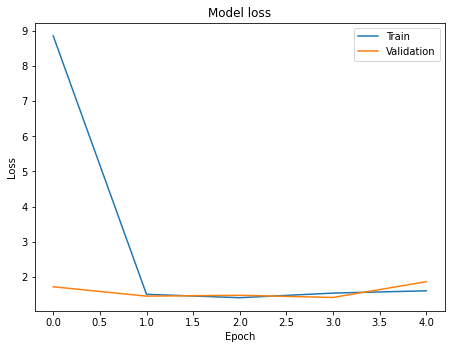

In [89]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25, wspace=0.35)

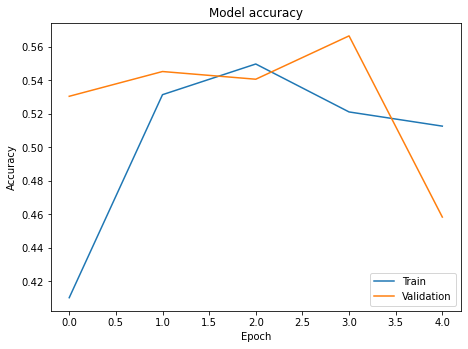

In [90]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25, wspace=0.35)